### 1. Постановка задачи

Провести анализ датасетов Iris Dataset ("Ирисы Фишера") для решения задачи классификации и Boston Housing Dataset ("Цены на жилье в Бостоне") для решения задачи регрессионного анализа.

### 2. Общая информация

Датасет "Ирисы Фишера" состоит из 150-ти строк, каждая из которых содержит информацию о 3-х видах ириса: `Setosa` - ирис щетинистый; `Versicolor` - ирис разноцветный; `Virginica` - ирис виргинский. Каждый класс представлен в наборе данных 50 экземплярами. Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

* sepal_length $-$ длина чашелистика;
* sepal_width $-$ ширина чашелистика;
* petal_length $-$ длина лепестков;
* petal_width $-$ ширина лепестков.

Целевая переменная - номер класса, соответствующего тому или иному виду ириса: $0$ $-$ `Setosa`, $1$ $-$ `Virginica`, $2$ $-$ `Versicolor`.

---

Датасет "Цены на жилье в Бостоне" состоит из 506 строк, каждая из которых содержит информацию об одном экземпляре недвижимости в различных районах города Бостон. Каждый экземпляр в наборе данных имеет 13 различных характеристик (атрибутов):

* CRIM $-$ уровень преступности на душу населения;
* ZN $-$ доля земли под жилую застройку, выделенной для участков площадью более 25 000 кв. футов;
* INDUS $-$ доля акров, не относящихся к розничной торговле, на район;
* CHAS $-$ переменная реки Чарльз (=1, если участок рядом с рекой; 0 - в противном случае);
* NOX $-$ концентрация оксидов азота (частей на 10 миллионов);
* RM $-$ среднее количество комнат в доме;
* AGE $-$ доля частных домов, построенных до 1940 года;
* DIS $-$ взвешенные расстояния до пяти бостонских центров занятости;
* RAD $-$ индекс доступности ближайших автомагистралей;
* TAX $-$ полная ставка налога на имущество на 10 000 долларов США;
* PTRATIO $-$ соотношение учеников и учителей в районе;
* B $-$ $1000\cdot(B_k — 0,63)^2$, где $B_k$ — доля чернокожего населения в районе;
* LSTAT $-$ процент населения в районе с более низким социальным статусом.


Целевая переменная $-$ MEDV $-$ средняя стоимость частных домов (в тыс. долл.).

### 3. Анализ датасета "Ирисы Фишера"

**Импорт необходимых библиотек.**   
Понадобятся: библиотека `numpy` - для работы с массивами, матрицами и упрощения выполнения различных математических операций; `pandas` - для удобства работы с табличными данными; `matplotlib` и `seaborn` - для визуализации промежуточных и конечных результатов исследования; `sklearn` - непосредственно для решения поставленных задач.

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn import metrics

**Загрузка и предобработка данных.**   
Загрузим датасет из библиотеки `sklearn` и выведем обзорную информацию о том, какие данные в нем содержатся.

In [41]:
iris = datasets.load_iris()
print(iris.feature_names)
print(iris.data[:5])
print(iris.target_names)
print(iris.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Преобразуем загруженные данные в датафрейм для удобства работы. Названия столбцов приведем в единый стиль - т. н. "змеиный регистр". Добавим в таблицу столбец `iris_category`, обозначающий вид ириса, и столбец `iris_name` - название вида ириса.

In [42]:
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data.set_axis(['sepal_length_cm', 'sepal_width_cm',
                    'petal_length_cm', 'petal_width_cm'], axis='columns', inplace=True)
iris_data['iris_category'] = iris.target
iris_data['iris_name'] = iris_data['iris_category'].apply(lambda x: iris.target_names[x])
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,iris_category,iris_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Просмотрим общую информацию о данных из датафрейма.

In [43]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   iris_category    150 non-null    int32  
 5   iris_name        150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


В таблице нет пропущенных значений, типы данных в столбцах заданы верно. В реальных условиях такое случается редко - почти всегда есть и пропущенные по тем или иным причинам значения, и несоответствия типов данных, и какие-либо аномалии в данных. Но поскольку для анализа взят готовый датасет из библиотеки `sklearn`, в нем уже все готово для дальнейшей работы, проводить предобработку нет необходимости.

**Визуализация данных и нахождение зависимостей.**   
Используем возможности библиотек `matplotlib` и `seaborn` для исследования.

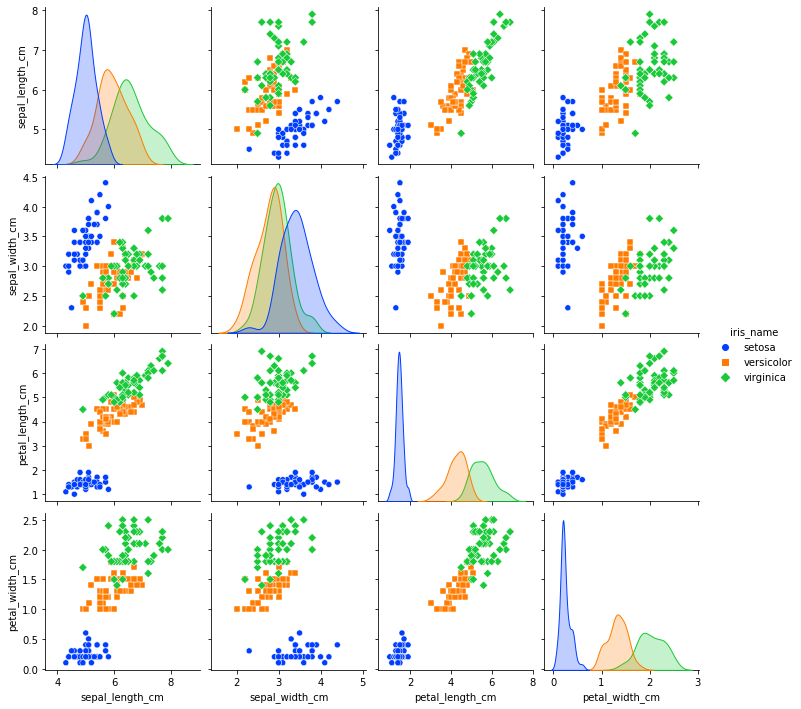

In [44]:
sns.pairplot(iris_data[iris_data.columns[iris_data.columns != 'iris_category']],
             hue="iris_name", markers=["o", "s", "D"], palette="bright")
plt.show()

Изучив графики распределения значений, можем прийти к следующим выводам:
* длина и ширина лепестков сильно между собой коррелируют - множества точек на графике вытянуты вдоль одной линии, что говорит о наличии линейной зависимости этих параметров друг от друга;
* у ирисов вида `setosa` множество значений любого параметра не пересекается с множествами значений других двух видов - это значит, что он легко линейно отделим от них.

Докажем первую гипотезу строго математически, вычислив коэффициент корреляции этих параметров.

In [45]:
np.corrcoef(iris_data['petal_length_cm'], iris_data['petal_width_cm'])[0, 1]

0.9628654314027961

Коэффициент действительно очень высокий - $0.96$. Теперь построим тепловую карту коэффициентов корреляции для всех зависимостей.

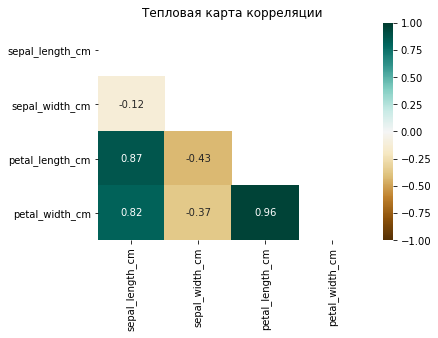

In [46]:
corr = iris_data[iris_data.columns[iris_data.columns != 'iris_category']].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG').set_title(
                            'Тепловая карта корреляции', fontdict={'fontsize':12});

Заметим, что помимо того, что длина и ширина лепестков очень хорошо коррелируют между собой, они также неплохо коррелируют с длиной чашелистика - коэффициенты равны $0.87$ и $0.82$ соответственно. Таким образом, если мы будем знать длину лепестков, мы сможем с приличной точностью предсказать их ширину, и наоборот. А зная длину чашелистика - сможем с неплохой точностью (но меньше, чем в первом случае) предугадать длину и ширину лепестков, и наоборот.

**Построение модели.**   
Выберем для нашей задачи линейную модель с общеизвестным методом стохастического градиентного спуска для оптимизации обучения. Сначала разделим данные на обучающую и тестовую выборку (сделаем это в отношении 70:30, указав параметр `test_size=0.3`). Далее объявим классификатор, указав только параметр `random_state=42`, чтобы при каждом запуске кода получать одинаковый результат, обучим модель при помощи метода `fit` и выведем метрики качества модели: `accuracy`, `precision`, `recall` и `f1-score` при помощи функции `classification_report`.

`accuracy` - доля верных предсказаний модели (как принадлежность объекта к классу, так и его непринадлежность).   
`precision` - это метрика, показывающая, какую долю среди всех объектов, причисленных классификатором к некоторому классу, составляют объекты, действительно являющиеся членами этого класса.   
`recall` - показывает, какую долю среди всех объектов, действительно являющихся членами некоторого класса, классификатор причислил к этому классу.   
`f1-score` - это метрика, объединяющая `presicion` и `recall`: берется среднее гармоническое от этих метрик, умноженное на 2 (чтобы в случае равенства их единице, `f1-score` тоже равнялось единице).

In [47]:
train_data, test_data, train_labels, test_labels = train_test_split(
    iris_data.drop(columns=['petal_length_cm', 'iris_category', 'iris_name']),
    iris_data['iris_name'], test_size=0.3, random_state=42)
model = linear_model.SGDClassifier(random_state=42)
model.fit(train_data, train_labels)
model_predictions = model.predict(test_data)
print(metrics.classification_report(test_labels, model_predictions))

              precision    recall  f1-score   support

      setosa       0.58      1.00      0.73        19
  versicolor       0.00      0.00      0.00        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.67        45
   macro avg       0.50      0.62      0.54        45
weighted avg       0.51      0.67      0.56        45



C:\Users\nikra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Точность предсказания `accuracy` получается неплохая, модель выдала порядка 67% верных предсказаний, однако что мы видим? Модель не отнесла ни одного экземляра ириса к виду `versicolor`! Это значит, что наша модель нуждается в доработке.

Одним из распространенных методов улучшения качества классификатора является подбор наиболее оптимальных параметров. Для этого служит метод `GridSearchCV`.

Рассмотрим параметры SGDClassifier, установленные по умолчанию:   
`class sklearn.linear_model.SGDClassifier(loss='hinge', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)`

Подберем оптимальное сочетание параметров `loss` - функция потерь, `alpha` - множитель регуляризации и `max_iter` - количество проходов по обучающим данным.

In [48]:
parameters = {
    'loss': ['hinge', 'log'],
    'alpha': np.linspace(1e-6, 0.1, 6),
    'max_iter': np.arange(100, 1000, 10)
}
grid = GridSearchCV(model, parameters, cv=10)
grid.fit(train_data, train_labels)
print(grid.best_params_)
print(grid.best_estimator_)

{'alpha': 0.020000800000000003, 'loss': 'log', 'max_iter': 100}
SGDClassifier(alpha=0.020000800000000003, loss='log', max_iter=100,
              random_state=42)


Теперь получим предсказания от этой модели и выведем метрики качества.

In [49]:
grid_pred = grid.predict(test_data)
print(metrics.classification_report(test_labels, grid_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.46      0.63        13
   virginica       0.65      1.00      0.79        13

    accuracy                           0.84        45
   macro avg       0.88      0.82      0.81        45
weighted avg       0.90      0.84      0.83        45



Точность предсказания `accuracy` получается очень хорошая, модель выдала порядка 84% верных предсказаний, идеально отличает вид `setosa`, но довольно часто путает `versicolor` и `virginica`. Что можно сделать, чтобы улучшить качество модели в этом аспекте?

Немного ранее из рассмотрения модели был исключен столбец `petal_length_cm`, поскольку он имеет высокую корреляцию с параметром `petal_width_cm`. Что, если вместо этого создать единый признак - комбинацию этих двух параметров? Запишем в новый столбец произведение длины и ширины лепестка, таким образом, новый признак - площадь лепестка. Затем снова обучим модель, получим предсказания и выведем метрики качества.

In [50]:
iris_data['petal_area'] = iris_data['petal_length_cm'] * iris_data['petal_width_cm']
train_data, test_data, train_labels, test_labels = train_test_split(
    iris_data[['sepal_length_cm', 'sepal_width_cm', 'petal_area']],
    iris_data['iris_name'], test_size=0.3, random_state=42)
model = linear_model.SGDClassifier(loss='log', alpha=0.02, max_iter=100, random_state=42)
model.fit(train_data, train_labels)
model_predictions = model.predict(test_data)
print(metrics.classification_report(test_labels, model_predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.85      0.92        13
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



Получили очень высокие показатели всех метрик качества. Осталась одна деталь, которая до этого оставалась такой, какой была взята в самом начале. Изначально был выбран размер тестовой выборки - 30% от общего числа данных. Что, если попробовать изменить ее размер - увеличить или уменьшить, получить предсказания в каждом случае, а затем усреднить результаты по метрикам? Для этого служит метод cross-validation.

In [51]:
real_class = []
pred_class = []

def report(real_labels, pred_labels):
    real_class.extend(real_labels)
    pred_class.extend(pred_labels)
    return metrics.accuracy_score(real_labels, pred_labels)

cross_val = cross_validate(model, test_data, test_labels, cv=10,
                           scoring=metrics.make_scorer(report))
print(metrics.classification_report(real_class, pred_class))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



Получили еще более высокие результаты, что может говорить об очень хорошем качестве построенной и обученной модели.

### 4. Анализ датасета "Цены на жилье в Бостоне"

**Загрузка и предобработка данных.**   
Необходимые библиотеки были импортированы выше, повторно импортировать их не нужно.   
Проделаем аналогичные действия - загрузим датасет из библиотеки `sklearn` и трансформируем его в датафрейм. Добавим также столбец с целевыми данными - средней стоимостью частных домов (в тыс. долл.).

In [76]:
boston = datasets.load_boston()
print(boston.feature_names)
print(boston.data[:5])
print(boston.target[:5])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]
[24.  21.6 34.7 33.4 36.2]


In [77]:
boston_data = pd.DataFrame(data=boston.data, columns=[x.lower() for x in boston.feature_names])
boston_data['medv'] = boston.target
boston_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Просмотр общей информации о данных в датафрейме.

In [78]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Заметим, что в столбцt `chas` тип данных `float`, хотя по смыслу должен быть целочисленный `int`. Заменим тип.

In [79]:
boston_data['chas'] = boston_data['chas'].astype('int')
print('Тип данных в столбце chas:', boston_data['chas'].dtype)

Тип данных в столбце chas: int32


Других проблем в датасете нет, данные готовы к дальнейшему исследованию.

**Визуализация данных и нахождение зависимостей.**   
На данном этапе будем искать зависимость средней стоимости домов от остальных переменных. В этом нам помогут графические средства библиотек `matplotlib` и `seaborn`.  

Для начала рассмотрим распределение целевых значений на графике и в числах.

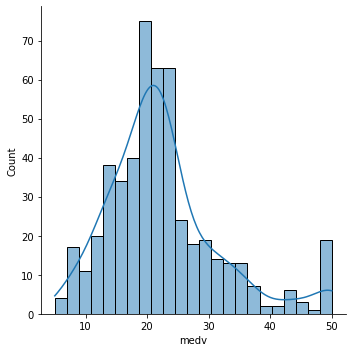

In [80]:
sns.displot(boston_data['medv'], kde=True)
plt.show()

In [81]:
boston_data['medv'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

Распределение похоже на нормальное, однако максимум значений немного смещен в меньшую сторону, а еще видим ощутимый скачок количества домов стоимостью 50 тысяч долларов - это больше похоже на выброс, который может помешать в исследовании. Также заметим, что три четверти домов находятся в ценовом сегменте до 25 тыс. долл.

Удалим из таблицы все дома стоимостью 50 тыс. долл.

In [82]:
boston_data = boston_data[boston_data['medv'] != 50.0].reset_index(drop=True)

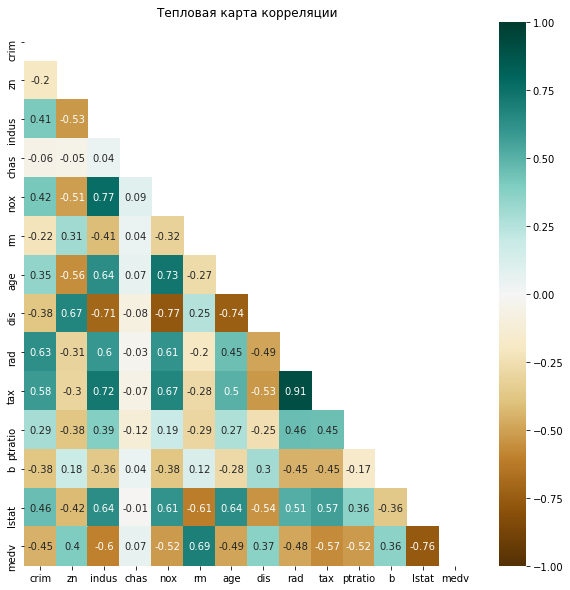

In [83]:
corr = boston_data.corr().round(2)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG').set_title(
                            'Тепловая карта корреляции', fontdict={'fontsize':12});

Исходя из этой таблицы, можно сделать следующие выводы:
* параметры `rad` и `tax` имеют наибольшую взаимосвязь - их коэффициент корреляции равен $0.91$;
* наибольшую связь с целевой переменной имеют характеристики `rm` (довольно высокая положительная корреляция) и `lstat` (большая отрицательная корреляция).

Выберем параметры `rm` и `lstat` и будем использовать их для обучения модели. Сначала продемонстрируем зависимость этих характеристик и средней цены домов.

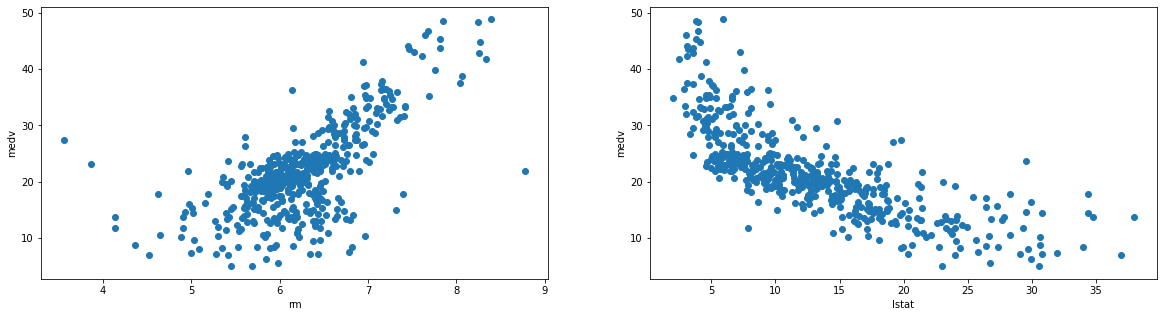

In [84]:
plt.figure(figsize=(20, 5))

features = ['rm', 'lstat']
target = boston_data['medv']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i + 1)
    x = boston_data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.xlabel(col)
    plt.ylabel('medv')

Первый график иллюстрирует положительную корреляцию `rm` и `medv`. Вполне ожидаемо - с ростом среднего количества комнат в доме увеличивается и цена; и хотя присутствуют значения, выпадающие из общей массы, основная часть рассредоточена вдоль одной линии.

Второй график демонстрирует отрицательную корреляцию параметров `lstat` и `medv`. Тоже предсказуемо - в районах, где мало людей с низким социальным статусом, недвижимость довольно дорогая, а где их больше, там и жилье подешевле. Несмотря на это, график лишь с натяжкой похож на линейный, скорее на гиперболу.

**Построение моделей.**   
Для данной задачи изучим 3 различных модели регрессионного анализа: обычную линейную регрессию `LinearRegression`, линейную модель со стохастическим градиентным спуском `SGDRegressor` и алгоритм "случайного леса" `RandomForestRegressor`.

Обучим эти модели, чтобы предсказать целевые данные. Разобьем набор данных на обучающее и проверочное множества в отношении 4:1, установив параметр `test_size=0.2`.

Для оценки качества моделей используем регрессионные метрики (иначе, функции потерь) - корень из средней квадратической ошибки `mean_squared_error` и коэффициент детерминации `r2_score`.

Средняя квадратическая ошибка рассчитывается как сумма квадратов разностей между реальным и предсказанным значением, деленная на число значений.   
Коэффициент детерминации получается путем вычитания из единицы отношения суммы квадратов остатков регрессии к сумме квадратов разностей между фактическим значением и средним.

In [92]:
data_train, data_test, medv_train, medv_test = train_test_split(
    boston_data[['rm', 'lstat']], boston_data['medv'], test_size=0.2, random_state=42)

for regressor in [linear_model.LinearRegression(),
                  linear_model.SGDRegressor(),
                  ensemble.RandomForestRegressor()]:
    model = regressor
    model.fit(data_train, medv_train)
    train_predict = model.predict(data_train)
    rmse = np.sqrt(metrics.mean_squared_error(medv_train, train_predict))
    r2 = metrics.r2_score(medv_train, train_predict)
    print(f"Метрики качества модели {regressor} (тренировочное множество):")
    print(f'Корень из среднеквадратической ошибки = {rmse:.3f}')
    print(f'Коэффициент детерминации = {r2:.3f}')
    print()
    test_predict = model.predict(data_test)
    rmse = np.sqrt(metrics.mean_squared_error(medv_test, test_predict))
    r2 = metrics.r2_score(medv_test, test_predict)
    print(f"Метрики качества модели {regressor} (тестовое множество):")
    print(f'Корень из среднеквадратической ошибки = {rmse:.3f}')
    print(f'Коэффициент детерминации = {r2:.3f}')
    print()

Метрики качества модели LinearRegression() (тренировочное множество):
Корень из среднеквадратической ошибки = 4.651
Коэффициент детерминации = 0.660

Метрики качества модели LinearRegression() (тестовое множество):
Корень из среднеквадратической ошибки = 4.438
Коэффициент детерминации = 0.614

Метрики качества модели SGDRegressor() (тренировочное множество):
Корень из среднеквадратической ошибки = 5.845
Коэффициент детерминации = 0.463

Метрики качества модели SGDRegressor() (тестовое множество):
Корень из среднеквадратической ошибки = 5.140
Коэффициент детерминации = 0.483

Метрики качества модели RandomForestRegressor() (тренировочное множество):
Корень из среднеквадратической ошибки = 1.452
Коэффициент детерминации = 0.967

Метрики качества модели RandomForestRegressor() (тестовое множество):
Корень из среднеквадратической ошибки = 3.378
Коэффициент детерминации = 0.777



По итогам сравнения моделей оказалось, что для выбранных параметров наиболее точно предсказывает цену домов регрессор на основе алгоритма «случайного леса»: на тренировочном множестве коэффициент детерминации близок к 1, а на тестовом – 0.777, но это все равно ощутимо лучше, чем линейные модели. Вероятно, для данной задачи линейные модели использовать нецелесообразно, поскольку параметры, которые больше всего коррелируют с целевой переменной, имеют абсолютное значение коэффициента корреляции порядка 0.6–0.7, что не так уж и близко к полной линейной зависимости.